In [4]:
# Essentials
import numpy as np
import pandas as pd
import datetime
from sklearn import datasets
from typing import Tuple
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns


# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Models

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.decomposition import PCA

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
    
import os
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics import silhouette_samples

# data visualization
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import silhouette_score

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

<IPython.core.display.Javascript object>

In [5]:
import numpy as np
from typing import Tuple

def load_data(filename: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    data = np.load(f'{filename}')
    return data['features'], data['domains'], data['digits']

features_train, domains_train, digits_train = \
    load_data('train_data.npz')

print(features_train.shape)
print(np.unique(domains_train, return_counts=True))

features_test, domains_test, digits_test = \
    load_data('test_data.npz')
print(features_test.shape)
print(np.unique(domains_test, return_counts=True))



(25000, 1024)
(array([0, 1, 2, 3, 4], dtype=int64), array([5000, 5000, 5000, 5000, 5000], dtype=int64))
(25000, 1024)
(array([0, 1, 2, 3, 4], dtype=int64), array([5000, 5000, 5000, 5000, 5000], dtype=int64))


In [6]:
# df_train = pd.DataFrame(features_train)
# df_train['domain_train'] = domains_train
# df_train['digit_train'] = digits_train

In [7]:
# df_train

In [8]:
# df_test = pd.DataFrame(features_train)
# df_test['domain_test'] = domains_test
# df_test['digit_test'] = digits_test

In [9]:
# df_test

In [10]:
# x_train = df_train.iloc[:, 0:-2]
# y_train = digits_train

In [11]:
# x_test = df_test.iloc[:, 0:-2]
# y_test = digits_test

## phase1

In [12]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(features_train, digits_train)

# Predict the Test set results
y_pred = rfc.predict(features_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score



In [13]:
print(accuracy_score(digits_test, y_pred))

0.86208


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits_test, y_pred)

array([[2378,  100,   53,   21,   23,    6,   29,   11,   21,   13],
       [   7, 3103,   64,   26,   43,   10,    6,   64,   16,    2],
       [  12,   81, 2516,   32,   15,   11,    5,   21,   18,    8],
       [  14,   77,   84, 2119,   31,   83,   11,    8,   39,   12],
       [  12,  129,   35,    9, 2091,    8,   20,   11,    6,   41],
       [  11,   38,   35,  147,   22, 1989,   57,    9,   22,   12],
       [  57,   65,   34,   39,   58,  110, 1884,    3,   55,    5],
       [  12,  107,   80,   19,   18,   10,    2, 2091,   10,   24],
       [  35,   86,   74,  133,   40,   72,   65,    6, 1621,   30],
       [  57,   42,   86,   60,   96,   49,   12,   44,   52, 1760]],
      dtype=int64)

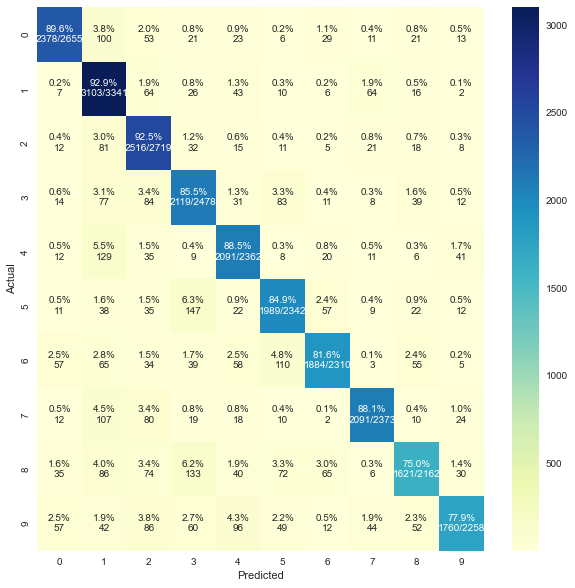

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(digits_test, y_pred)

In [16]:
model = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)

In [17]:
model.fit(features_train,digits_train)
y_pred = model.predict(features_test)
accuracy_score(digits_test, y_pred)

0.87224

In [ ]:


# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in range(200,2000,200)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)



In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(features_train,digits_train)